In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
''' Load data.

    We will be using Fashion MNIST data.
    Fashion MNIST consists of 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale       image. 
    Labels will be in number, not in words because:
        1. Computers are still better with numbers
        2. Issue of Bias. If we label it using English, 
           then we are showing bias to English.
    So by using numbers, we can point to a text description in any language!
'''

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

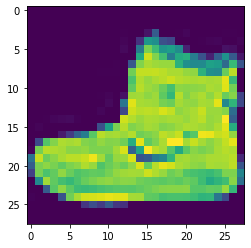

In [31]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [32]:
''' Normalize data.
    If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process          called 'normalizing'
'''
train_images = train_images / 255.0
test_images = test_images / 255.0

In [33]:
''' Build model. 

    Sequential: That defines a SEQUENCE of layers in the neural network
    Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns               it into a 1 dimensional set.
    Dense: Adds a layer of neurons

    First layer: input of 28*28 images
    Middle layer: filter(0~127) that takes 128 parameters so that when all shoe pictures are fed into them one by one,
                  the combination of all parameters will produce an output value of correct class
    Last layer: 10 ouput classes
    This nn will acts like a filter that takes input of 28 by 28 and output 1 of 10 values.

    The nn will be initialized with random (parameters) values, then improve by using loss function and optimizer.
    Loss function: sees how good or bad the nn performed with the parameters
    Optimizer: generate new parameters for the function to see whether it can do better

    Activation: 
    relu = rectify linear unit
           if (x>0){
               return x;
           } else {
               return 0;
           }
    softmax : picking the biggest number from a set
            : the output layer has 10 items in it, each representing the probability of each class
            : instead of searching through the whole layer to find the greatest probability, 
              the softmax function sets it to 1 and others to 0
'''

model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28, 28)),
                            keras.layers.Dense(128, activation=tf.nn.relu),
                            keras.layers.Dense(10, activation=tf.nn.softmax) 
                        ])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
''' Train model with train images & labels, and test it with test data. (Test data consists of test images and labels that the model hasn't seen)

    epochs: a measure of the number of times all of the training vectors are used once to update the parameters


'''
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
prediction = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4977 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3742 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3147 - accuracy: 0.8829
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8722


### Try predicting the class of test_images
The output will be the probability that this test_images[0] is each of the 10 classes
The 10th element on the output list is the biggest, so test_images[0] labelled 9


In [35]:
classifications = model.predict(test_images)
print(classifications[0])

[2.7844271e-07 1.9195147e-08 3.7464257e-08 1.2051518e-07 1.4066318e-07
 2.2506926e-03 4.7513637e-07 2.8662372e-02 3.0298233e-05 9.6905553e-01]


### Effect of the number of neurons

More neurons will cause training takes longer, but is more accurate
That doesn't mean it's always a case of 'more is better'

Eg:
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

### Flatten layer & Last Dense layer(Output layer)

If we remove the Flatten() layer from the model, 
then we'll get an error about the shape of the data.
the first layer in your network should be the same shape as your data. 
Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that      28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and      when the arrays are loaded into the model later, they'll automatically be flattened for us.

Also, the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's        the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer. If we change the output layer 
to only 5 neurons then we'll get error.


### Effects of additional layers in the network. 
What will happen if you add another layer between the one with 512 and the final layer with 10?

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.